# Bootstrapping
In Chapter 3, we have learned that Bootstrapping is a powerful statistical tool that helps us to measure the uncertainty in the prediction of a model. In this activity, we implement this technique to assess variations in the prediction of KNN classifier. In **Assignment Task 2.B.**, you will be asked to expand this example and develop a bootstrap procedure for KNN as a regressor. 

# Steps for Activity 1.2
<ol>
	<li>Load the training dataset,</li>
    <li>Implement bootstrap sampling,</li>
	<li>Apply <code>bootstrap </code>function <code> with times = 40</code> (the number of samples) <code>and size = 50 </code> (the size of each sample) on <code>knn </code>for $K\in{1,\dots,30}$,</li>
	<li>Report the uncertainty in the prediction in percentages.</li>
	<li>Repeat Step 2 with different values of K, times and size.</li>
</ol>

# Implementation of the Above Steps

In [1]:
# load libraries:
library(reshape2)
library(ggplot2)

In [2]:
# Load data:
library(datasets)
data(iris)

In [3]:
# permute iris:
iris <- iris[sample(1:nrow(iris),nrow(iris)),]
# create training and testing datasets:
train.index = 1:100
train.data <- iris[train.index, -5]
train.label <- iris[train.index, 5]
test.data <- iris[-train.index, -5]
test.label <- iris[-train.index, 5]

In [4]:
# define a function that generates sample indixes based on bootstrap technique
boot <- function (original.size=100, sample.size=original.size, times=100){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}
# just to see if it works!
boot(100, 10, 5)

66,76,22,15,74,33,23,36,14,68
39,98,2,62,3,37,70,47,96,10
71,23,27,70,75,14,38,78,47,69
37,94,19,58,11,57,78,65,70,69
46,62,53,61,56,59,16,40,99,17


## Application in KNN Classifer 

In [5]:
# This is the KNN classifer that we implemented in Activity 1.1

# define a function that calculates the majority votes (or mode!)
majority <- function(x) {
   uniqx <- unique(x)
   uniqx[which.max(tabulate(match(x, uniqx)))]
}

# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
    train.len <- nrow(train.data)
    test.len <- nrow(test.data)
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    for (i in 1:test.len){
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        test.label[i]<- (majority(train.label[nn]))
    }
    return (test.label)
}

# fix the parameters (50,40,50)
K <- 30           # Maximum K for KNN 
L <- 40           # number of datasets
N <- 50          # size of datasets

# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

# a dataframe to track the number of missclassified samples in each case
miss <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

In [6]:
# THIS MAY TAKE A FEW MINUTES TO COMPLETE
## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        miss[i,'K'] <- k
        miss[i,'L'] <- l
        
        #### calculate and record the train and test missclassification rates
        miss[i,'test'] <-  sum(knn(train.data[indx, ], train.label[indx], test.data, K=k)  != test.label)/nrow(test.data)*100
    } 
}

### Visalization
Let see the output. In the following Jitter Plot, each point corrspends to the error (measured on the fixed test set) of the KNN classifier trained by a random training sample generated during our bootstrap sampling. 

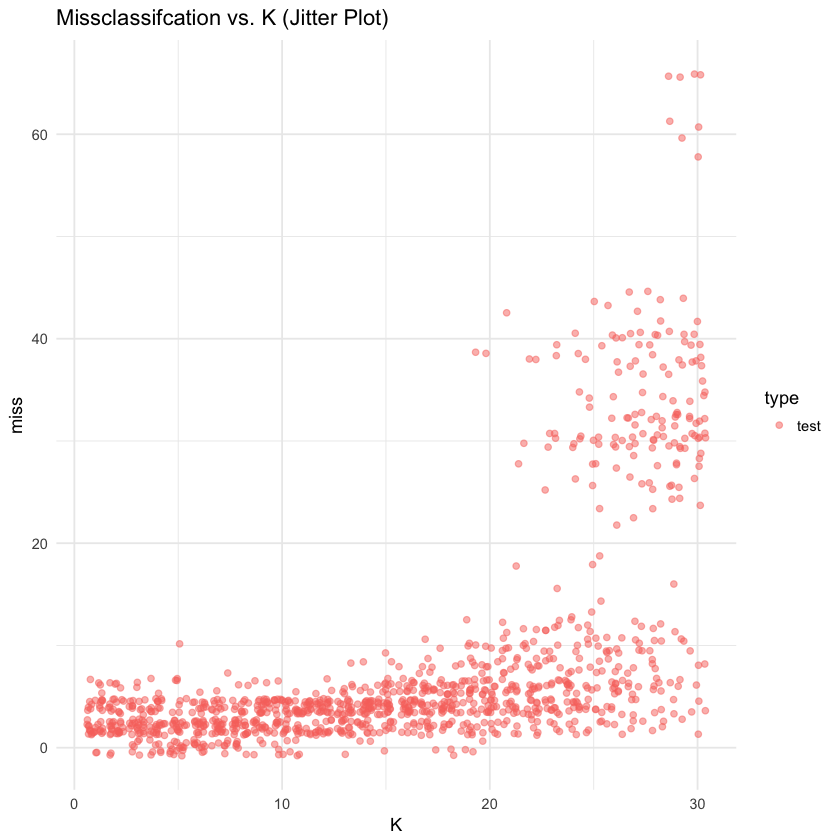

In [7]:
# plot misclassification percentage for train and test data sets
miss.m <- melt(miss, id=c('K', 'L')) # reshape for visualization
names(miss.m) <- c('K', 'L', 'type', 'miss')
ggplot(data=miss.m, aes(x=K, miss, color=type)) + geom_jitter(alpha=0.5)  + 
    scale_fill_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Missclassifcation vs. K (Jitter Plot)') + theme_minimal() 

Now we produce the box plot of the error numbers (each of which corresponding to a sample in our bootstrap sampling) we have obtained for our test set for each value of K. 

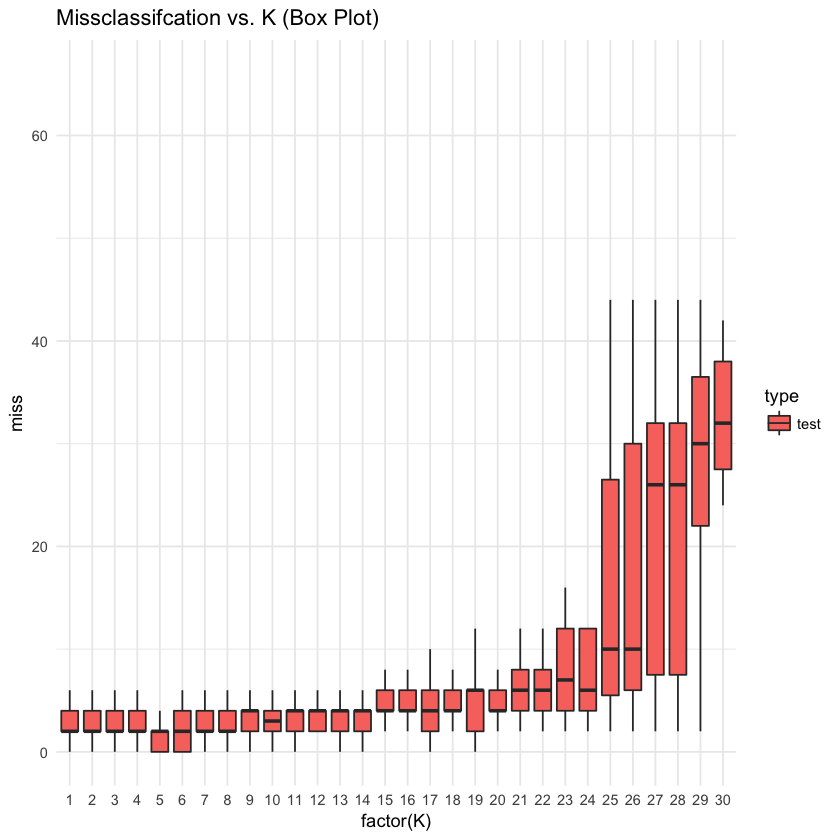

In [8]:
ggplot(data=miss.m[miss.m$type=='test',], aes(factor(K), miss,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Missclassifcation vs. K (Box Plot)') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

# Discussions
<ol>
    <li>As $K$ increases, how does the test error and its uncertainty behave (represented by the boxplots)? </li>
    <li>Rerun the above experiments for other values of `times` and `size`, then explain how increasing the number of samples and the size of each sample affect the error uncertainty.</li>
</ol>